In [4]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tabulate

In [30]:
def load_data(exp):
    df_ad = pd.read_csv(f'csvs/exp_{exp}.anc_desc.csv')
    df_dl = pd.read_csv(f'csvs/exp_{exp}.diff_lin.csv')
    df_mp3 = pd.read_csv(f'csvs/exp_{exp}.mp3.csv')
    # df_ll = pd.read_csv(f'csvs/exp_{exp}.loglikelihood.csv')
    df_ad.columns=["SASC","PSO","GP","VNS","Measure"]
    df_dl.columns=["SASC","PSO","GP","VNS","Measure"]
    df_mp3.columns=["SASC","PSO","GP","VNS","Measure"]
    #re-order to keep color consistency
    # df_ll = df_ll[["reSASC", "Dollo-k", "PP", "Measure"]]
    
    return df_ad, df_dl, df_mp3

In [35]:
def boxplot(dfs, out=None, title=None, out2=None):
    f, ax = plt.subplots(1, 3, figsize=(7,3))
    for ix, df in enumerate(dfs):
        _ix = ix
        ax[_ix] = sns.boxplot(data=df, ax=ax[_ix], linewidth=1.5)
        ax[_ix] = sns.stripplot(data=df, ax=ax[_ix], alpha=.7, size=4, edgecolor="gray", linewidth=.5)
        ax[_ix].set(title=df["Measure"][0])
    if title:
        f.suptitle(title)

    plt.tight_layout()
    
    if out:
        f.savefig(out)
    if out2:
        f.savefig(out2)
    return ax

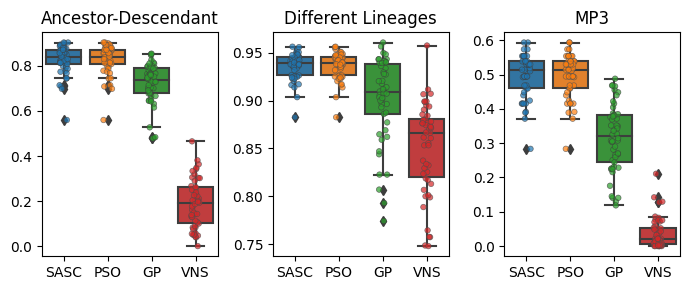

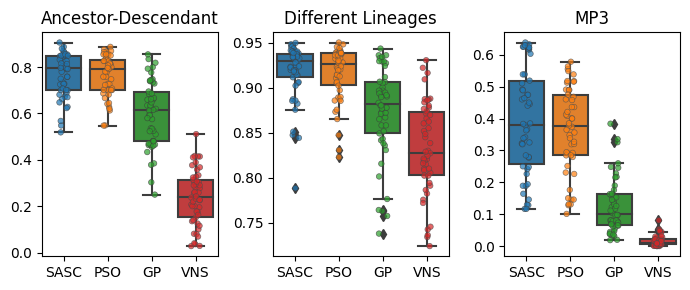

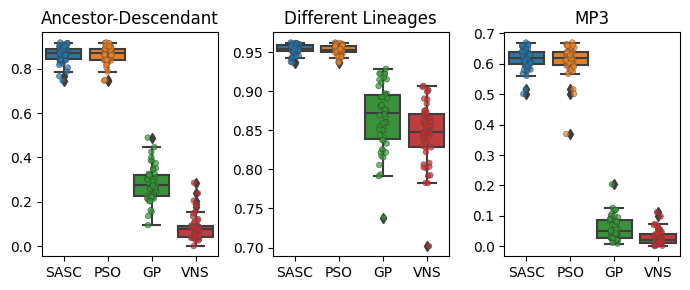

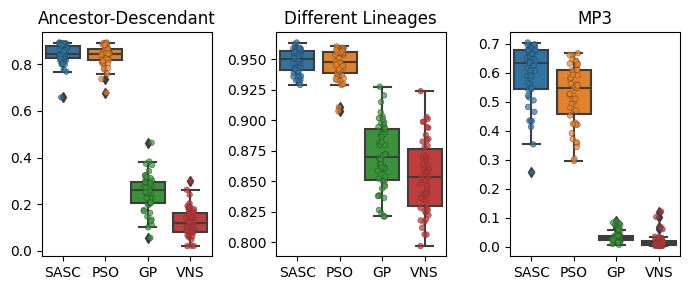

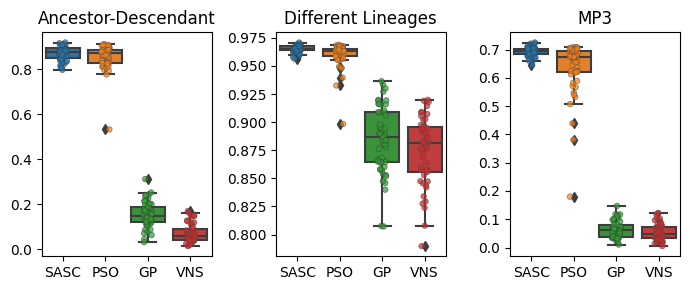

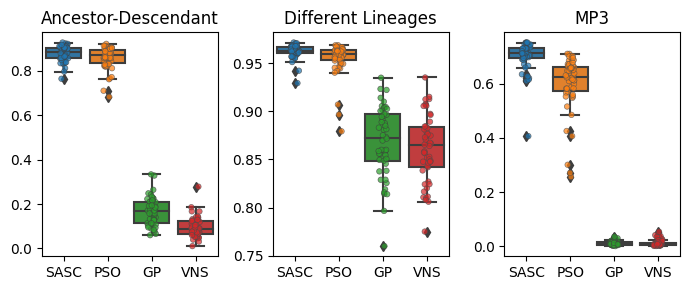

In [37]:
suppl = [" — Perfect Phylogeny", " — Dollo-3"]
for ix, exp in enumerate(["m15_n50_pp", "m15_n50_k3", "m30_n100_pp", "m30_n100_k3", "m50_n200_pp", "m50_n200_k3"]):
    boxplot(load_data(exp), out=f'plots/exp.{exp}.pdf', 
    # title=f"Experiment {exp}"
    # title=f"Experiment {ix+1}{suppl[ix%2]}",
    out2=f'plots/exp.{ix+1}.pdf'
    )
